In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
df['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

In [ ]:
df.isnull().sum()

text    0
spam    0
dtype: int64

# separet x y

In [ ]:
x = df.text.values
y = df.spam.values

# split dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

# Data prepocessing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
x_train = cv.fit_transform(xtrain)

In [ ]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# ML algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(x_train,ytrain)

MultinomialNB()

In [ ]:
x_test = cv.transform(xtest)

In [ ]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
model.score(x_test,ytest)

0.9938542581211589

In [ ]:
email = ['hey i am loking for machine learning tutorial in bengla','hey you win an iphone x giveaaway for free please do the serve']

In [ ]:
cv_email= cv.transform(email)

In [ ]:
model.predict(cv_email)

array([0, 1], dtype=int64)

# Performance

In [ ]:
pre = model.predict(x_test)

In [ ]:
pre

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,pre)

0.9938542581211589

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf= confusion_matrix(ytest,pre)
cf

array([[863,   3],
       [  4, 269]], dtype=int64)

<AxesSubplot:>

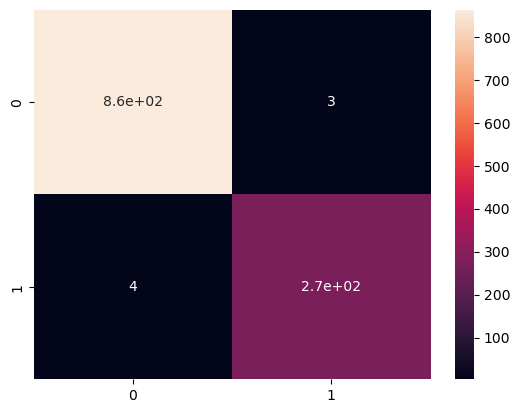

In [ ]:
sns.heatmap(cf,annot=True)
#print(tn, fp, fn, tp = cf().ravel())


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       866
           1       0.99      0.99      0.99       273

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



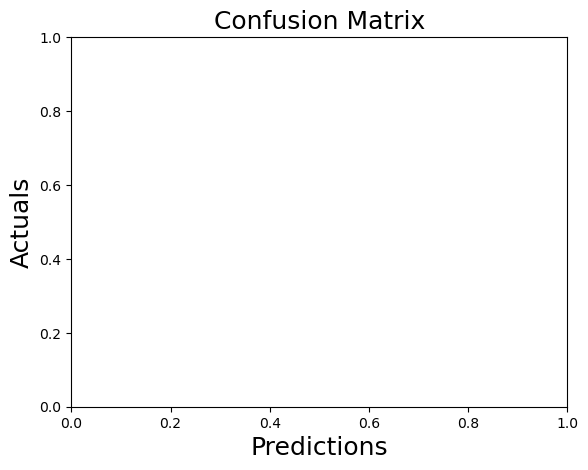

In [ ]:
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()